# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment: Speech and Audio Processing

## Learning Objectives

At the end of the experiment you will be able to :

* extract the features from audio samples/data
* implement the Convolutional Neural Networks (CNN) model to classify emotions
* evaluate the CNN trained model on the testset

## Dataset

**Ravdess Dataset**

The Ryerson Audio-Visual Database of Emotional Speech and Song [RAVDESS](https://zenodo.org/record/1188976#.YuuUNhxBzIV) contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes `calm, happy, sad, angry, fearful, surprise`, `and disgust` expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression. The conditions of the audio files are: 16bit, 48kHz .wav.


**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Domain Information

**What is Speech Emotion Recognition?**

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner.


**What is librosa?**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).




### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236974" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7259357831" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M3_AST_25_Speech_Emotion_Classifier_C" #name of the notebook

def setup():
    ipython.magic("sx pip install huggingface_hub")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages


In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.nn as nn
from tqdm import tqdm
import librosa
from pathlib import Path
import torch.nn.functional as F

### huggingface_hub library

The **huggingface_hub** is a client library to interact with the Hugging Face Hub. The Hugging Face Hub is a platform with over 35K models, 4K datasets, and 2K demos in which people can easily collaborate in their ML workflows. The Hub works as a central place where anyone can share, explore, discover, and experiment with open-source Machine Learning.

With huggingface_hub, you can easily download and upload models, extract useful information from the Hub, and do much more. Some example use cases:

* Downloading and caching files from a Hub repository.
* Creating repositories and uploading an updated model every few epochs.
* Extract metadata from all models that match certain criteria (e.g. models for text-classification).
* List all files from a specific repository.

**Note:**

1. Refer to the following [link](https://pypi.org/project/huggingface-hub/) to undertsand about Hugging Face Hub

2. Refer to the following [link](https://huggingface.co/docs/hub/models-adding-libraries) to understand about integrating your library with the Hub

**Download datset files from the Hub**

The hf_hub_download() function is the main function to download files from the Hub. One advantage of using it is that files are cached locally, so you won't have to download the files multiple times. If there are changes in the repository, the files will be automatically downloaded again.
hf_hub_download

The function takes the following parameters, downloads the remote file, stores it to disk (in a version-aware way) and returns its local file path.

Parameters:

    a repo_id (a user or organization name and a repo name, separated by /)
    a filename (the name of the file in the repo)
    a force_filename (str, optional) — Use this name instead of a generated file name.
    a cache_dir which you can specify if you want to control where on disk the files are cached.

**Note:** Refer to the following [link](https://huggingface.co/docs/huggingface_hub/package_reference/file_download) to understand more about hub download parameters

#### Download the data


In [ ]:
# Install the Hub library using pip
# Integration allows users to download your hosted files directly from the Hub using your library.
# Use the hf_hub_download function to retrieve a URL and download files from your repository
# Downloaded files are stored in your cache
from huggingface_hub import hf_hub_download
hf_hub_download(
                repo_id='viks66/ravdess_speech',
                filename="ravdess.zip",
                cache_dir='./',
                force_filename='ravdess.zip',
                repo_type='dataset',
                )

'./ravdess.zip'

In [ ]:
# Unizip the ravdess dataset files
!unzip -q ravdess.zip

In [ ]:
data_path = 'ravdess/'

### Load the ravdess data audio files

In [ ]:
# Function to get the .wav files and Map the labels for each wav file
def get_files(path, extension='.wav'):
    return list(path.rglob(f'*{extension}'))
label_id = {"01": "neutral",
            '02': "calm",
            '03': "happy",
            '04': "sad",
            '05': "angry",
            '06': "fearful",
            '07': "disgust",
            '08': "surprised",
           } #let label_id = label_id - 1, eg: 01 = 0, 02=1, etc

In [ ]:
# Get all files from the ravdess data folders
all_files = get_files(Path(data_path))
print(len(all_files))

# storing 24 actors files
speakers = set([str(l).split('/')[-2] for l in all_files])

# Assigning labels to each .wav file in all the actor folders
# Note: the label id starts from 0 to 7
labels = {str(l):int(l.stem.split('-')[2][-1])-1 for l in all_files}
print(len(speakers))
print(speakers)

1440
24
{'Actor_02', 'Actor_07', 'Actor_16', 'Actor_15', 'Actor_24', 'Actor_11', 'Actor_22', 'Actor_14', 'Actor_03', 'Actor_05', 'Actor_23', 'Actor_10', 'Actor_20', 'Actor_04', 'Actor_06', 'Actor_01', 'Actor_18', 'Actor_12', 'Actor_13', 'Actor_21', 'Actor_09', 'Actor_17', 'Actor_08', 'Actor_19'}


#### Play the sample audio of Ravdess data

In [ ]:
import IPython.display as ipd
ipd.Audio('/content/ravdess/Actor_13/03-01-03-02-01-01-13.wav')

#### Visualization of a sample audio signal using librosa in time series domain

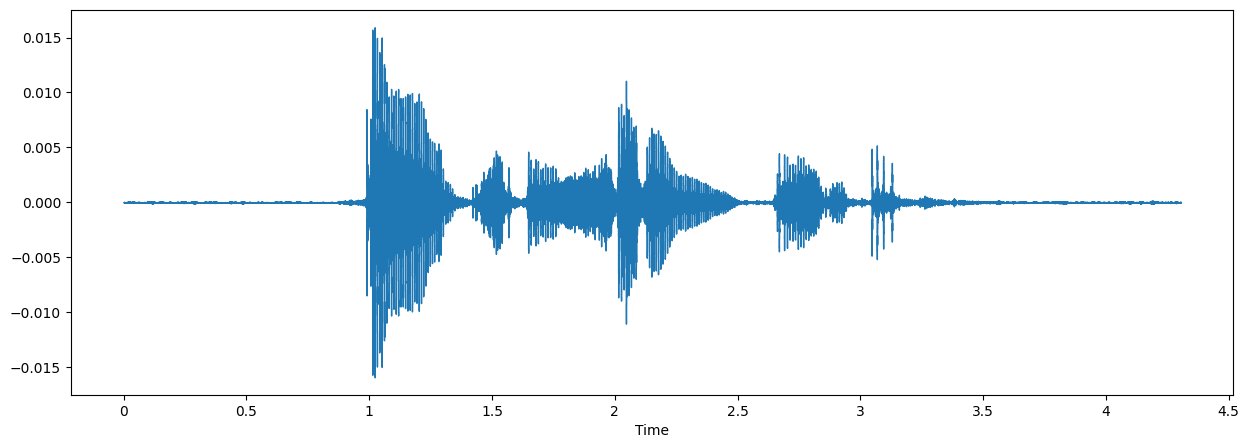

In [ ]:
from matplotlib import pyplot as plt
import librosa.display

sample_audio_path = '/content/ravdess/Actor_05/03-01-02-02-02-02-05.wav'

# librosa is used for analyzing and extracting features of an audio signal
data, sampling_rate = librosa.load(sample_audio_path)
plt.figure(figsize=(15, 5))

# librosa.display.waveshow is used to plot waveform of amplitude vs time
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

In [ ]:
# Slecting the the actors for testing (Actor 01, 02, 03, 04)
test_speakers = ['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04']

### Define Emotion Dataset using pytorch and extracting features using MFCC




#### Feature Extraction

When we listen to an audio sample it changes constantly. This means that speech is non-stationary signal. Therefore, normal signal processing techniques cannot be applied to get features from audio. However, if the speech signal is observed using a very small duration window, the speech content in that small duration appears to be stationary. That brought in the concept of short-time processing of speech.

**MFCC** is a technique for short-time processing of speech.

In this short-time processing technique **MFCC**, a small duration window (say 25 milli sec) is considered for processing of the audio samples at a time. This small duration is called a frame. Now, for each of the frames, MFCC features are computed which gives a compact representation of the audio samples.


Create **Mel Frequency Cepstral Coefficient (MFCC)** features which represents the short-term power spectrum of a sound and Labels dataset. These feature count is small enough to force us to learn the information of the audio. 12 parameters are related to the amplitude of frequencies. It provides us enough frequency channels to analyze the audio.
The output after applying MFCC is a matrix having feature vectors extracted from all the frames

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function.

To know more about MFCC, explore the [link](https://jonathan-hui.medium.com/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9)

In [ ]:
# Prepare the Emotion dataset and split into train, test and validation
class EmotionDataset(Dataset):
    def __init__(self, mode, test_speakers, labels ,num_val=200):
        # Select the speakers not in the test test
        if mode == 'train' or mode == 'val':
            label_names = sorted([l for l in labels if l.split('/')[-2] not in test_speakers])
        elif mode == 'test':
            label_names = sorted([l for l in labels if l.split('/')[-2] in test_speakers])
        if mode == 'val':
            label_names = label_names[:num_val]
        elif mode == 'train':
            label_names = label_names[num_val:]
        self.label_names = label_names
        self.label_dict = labels

    def __len__(self):
        return len(self.label_names)

    def __getitem__(self, idx):
        """Function Extracts Features from WAV(aduio) file"""
        # Load an audio file as a floating point time series
        # which returns audio time series and sampling rate of y
        y, sr = librosa.load(self.label_names[idx])
        # Mel-frequency cepstral coefficients (MFCCs), represents the short-term power spectrum of a sound
        # number of MFCCs to return is 13 over each time frame
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T
        return torch.from_numpy(mfcc), self.label_dict[self.label_names[idx]]

class BatchPadCollafeFn():
     """ padding sequential data to max length of a batch.
     Zero-pads model inputs and targets based on number of frames per step """
     def __init__(self):
        pass
     def __call__(self, batch):
        # zero-pad all one-hot text sequences to max input length
        input_lengths, ids_sorted_decreasing = torch.sort(
            torch.LongTensor([len(x[0]) for x in batch]),
            dim=0, descending=True)
        max_input_len = input_lengths[0]
        mfcc_padded = torch.LongTensor(len(batch), max_input_len, batch[ids_sorted_decreasing[0]][0].shape[-1])
        mfcc_padded.zero_()
        labels = torch.LongTensor(len(batch))
        for i in range(len(ids_sorted_decreasing)):
            mfcc = batch[ids_sorted_decreasing[i]][0]
            mfcc_padded[i, :mfcc.shape[0], :] = mfcc
            labels[i] = batch[ids_sorted_decreasing[i]][1]
        return mfcc_padded, labels

### Loading the dataset

In [3]:
traindataset = EmotionDataset(mode='train', test_speakers=test_speakers, labels=labels)
valdataset = EmotionDataset(mode='val', test_speakers=test_speakers, labels=labels)
testdataset = EmotionDataset(mode='test', test_speakers=test_speakers, labels=labels)

In [5]:
batch_size = 20

# A custom collate_fn can be used to customize collation, e.g., padding sequential data to max length of a batch
trainloader = DataLoader(traindataset, batch_size=batch_size, collate_fn=BatchPadCollafeFn())
valloader = DataLoader(valdataset, batch_size=batch_size, collate_fn=BatchPadCollafeFn())
testloader = DataLoader(testdataset, batch_size=batch_size, collate_fn=BatchPadCollafeFn())

### Define the CNN model

In [ ]:
class Model(nn.Module):
    def __init__(self, in_channel=13):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channel, 32, 3)
        self.conv2 = nn.Conv1d(32, 64, 3)
        self.conv3 = nn.Conv1d(64, 128, 3)
        self.dense = nn.Linear(128, 8)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = torch.mean(x, -1)

        return self.dense(x)

### Define train and test functions

In [ ]:
def train(loader):
    model.train()
    n_classes = 8
    # Cross entropy as loss function
    lossfn = nn.CrossEntropyLoss()

    # Define the confusion matrix with zeros of no of classes
    confusion_matrix = torch.zeros(n_classes, n_classes)

    losses = []
    for data, label in tqdm(loader):

        # Convert data and labels to torch tensor
        data, label = data.to(device), label.to(device)

        # Pass the data through the model
        out = model(data.float())

        # Calculate the loss
        loss = lossfn(out, label)

        # Zero out the gradients
        optimiser.zero_grad()

        # Do backpropagation
        loss.backward()

        # Update the weights accordingly
        optimiser.step()
        losses.append(loss.item())

        # Take max probability of predictions
        _, preds = torch.max(out, 1)

        # Print the loss and updated confusion matrix with labels original and predictions
        for t, p in zip(label.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    return sum(losses)/len(losses), confusion_matrix.diag()/confusion_matrix.sum(1)

In [ ]:
def val(loader):
    # Keep the model to evaluation mode
    model.eval()
    n_classes = 8
    lossfn = nn.CrossEntropyLoss()
    confusion_matrix = torch.zeros(n_classes, n_classes)
    losses = []
    for data, label in tqdm(loader):
        data, label = data.to(device), label.to(device)
        out = model(data.float())
        loss = lossfn(out, label)
        losses.append(loss.item())
        _, preds = torch.max(out, 1)
        for t, p in zip(label.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
    return sum(losses)/len(losses), confusion_matrix.diag()/confusion_matrix.sum(1)

In [ ]:
device = 'cuda'
lr = 0.0001 # Learning rate
model = Model().to(device).float() # Conver the model to cuda runtime
optimiser = torch.optim.Adam(model.parameters(), lr=lr) # Adam optimizer

In [ ]:
print(model)

Model(
  (conv1): Conv1d(13, 32, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,))
  (conv3): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
  (dense): Linear(in_features=128, out_features=8, bias=True)
)


### Training and validating the model

In [1]:
num_epochs = 10
trainloss, trainaccs, valloss, valaccs = [], [], [], []
for ep in range(num_epochs):
    loss, accs = train(trainloader)
    trainloss.append(loss)
    trainaccs.append(accs)
    loss, accs = val(valloader)
    valloss.append(loss)
    valaccs.append(accs)
    print(trainloss[-1], valloss[-1])
    print(trainaccs[-1], valaccs[-1])

NameError: ignored

### Please answer the questions below to complete the experiment:




In [ ]:
#@title Q.1. Pre-emphasis processing applies a filter to the input signal that emphasizes the amplitudes of higher frequencies and lowers the amplitudes of lower frequency bands.
Answer1 = "True" #@param ["","True", "False"]


**Consider the following statements and answer Q2:**

i. acoustic feature extraction is performed because raw waveform is high dimensional and difficult to model

ii. Acoustic features are extracted to reduce dimensionality



In [ ]:
#@title Q.2. Which of the above statement(s) regarding acoustic feature extraction is true?
Answer2 = "Both i, ii" #@param ["","i only", "ii only", "Both i, ii", "Neither i nor ii"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "None" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2123
Date of submission:  23 Jul 2023
Time of submission:  11:07:03
View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions
